In [13]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import neighbors

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [109]:
# encode the address
trainset = pd.read_csv('train.csv', parse_dates = ['Dates'])
trainset = trainset.head(3000)
testset = pd.read_csv('test.csv', parse_dates = ['Dates'])
testset = testset.head(3000)
label = preprocessing.LabelEncoder()
addr = label.fit_transform(trainset.Address) 

train = pd.concat([pd.get_dummies(trainset.DayOfWeek), pd.get_dummies(trainset.PdDistrict), pd.get_dummies(trainset.Dates.dt.hour)], axis=1)    
train['addr'] = addr
test = pd.concat([pd.get_dummies(testset.DayOfWeek), pd.get_dummies(testset.PdDistrict), pd.get_dummies(testset.Dates.dt.hour)], axis=1)   


In [110]:
# encode the category
label = preprocessing.LabelEncoder()
crime = label.fit_transform(trainset.Category) 

#train = pd.concat([pd.get_dummies(trainset.DayOfWeek), pd.get_dummies(trainset.PdDistrict), pd.get_dummies(trainset.Dates.dt.hour)], axis=1)    
train['crime'] = crime
#test = pd.concat([pd.get_dummies(testset.DayOfWeek), pd.get_dummies(testset.PdDistrict), pd.get_dummies(testset.Dates.dt.hour)], axis=1)   


In [127]:
# split into training set and test set
training, validation = train_test_split(train, train_size=0.5)# TODO: gridsearchCV

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Bayesian Model

In [128]:
training.columns

Index([    'Friday',     'Monday',   'Saturday',     'Sunday',   'Thursday',
          'Tuesday',  'Wednesday',    'BAYVIEW',    'CENTRAL',  'INGLESIDE',
          'MISSION',   'NORTHERN',       'PARK',   'RICHMOND',   'SOUTHERN',
          'TARAVAL', 'TENDERLOIN',            0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,       'addr',      'crime'],
      dtype='object')

In [129]:
training.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,...,16,17,18,19,20,21,22,23,addr,crime
2913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,846,16
2802,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1354,13
817,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,604,11
2553,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,362,27
1939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1563,13


In [130]:
training = training[[ 'BAYVIEW', 'CENTRAL', 'INGLESIDE',
          'MISSION', 'NORTHERN',  'PARK','RICHMOND','SOUTHERN',
          'TARAVAL', 'TENDERLOIN','addr','crime']]

In [131]:
validation = validation[[ 'BAYVIEW', 'CENTRAL', 'INGLESIDE',
          'MISSION', 'NORTHERN',  'PARK', 'RICHMOND','SOUTHERN',
          'TARAVAL', 'TENDERLOIN','addr','crime']]

In [132]:
training.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,addr,crime
2913,0,0,0,1,0,0,0,0,0,0,846,16
2802,0,1,0,0,0,0,0,0,0,0,1354,13
817,0,0,0,0,0,0,0,0,1,0,604,11
2553,0,0,0,1,0,0,0,0,0,0,362,27
1939,0,0,0,0,1,0,0,0,0,0,1563,13


In [133]:
training.describe()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,addr,crime
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.092667,0.12600,0.087333,0.122000,0.123333,0.062667,0.061333,0.165333,0.088667,0.070667,867.322000,15.405333
std,0.290061,0.33196,0.282417,0.327395,0.328929,0.242443,0.240021,0.371605,0.284357,0.256353,506.201986,7.637621
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,428.000000,13.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,879.000000,16.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1253.000000,17.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1805.000000,30.000000


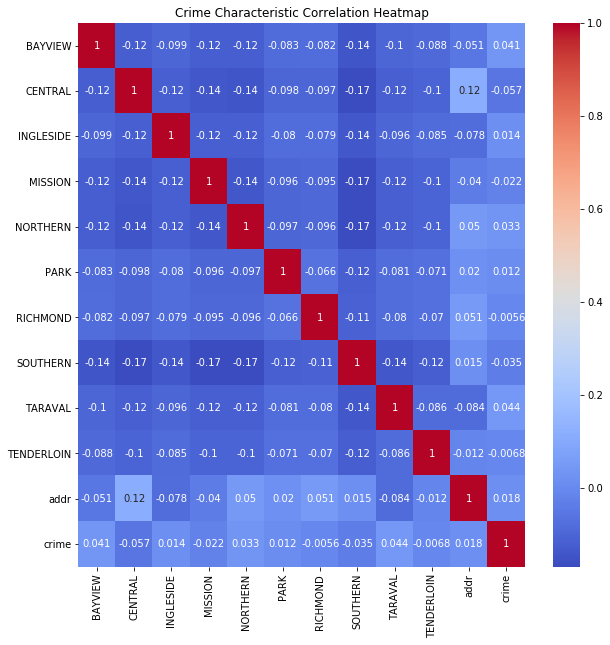

In [134]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Crime Characteristic Correlation Heatmap")
# Generating a correlation heatmap
corr = training.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, 
           cmap="coolwarm")
plt.show()

In [139]:
feature_list = training.columns.tolist()   
feature_list = feature_list[:len(feature_list)-2] 

In [140]:
# Naïve Bayes Model
nb_model = GaussianNB()
nb_model.fit(training[feature_list], training['crime'],training['addr'])
print('Naïve Bayes accuracy for train set: %f' % nb_model.score(training[feature_list], training['crime'],training['addr']))

# test on the test set 
test_predicted = np.array(nb_model.predict_proba(test[feature_list])) 

Naïve Bayes accuracy for train set: 0.009993


In [141]:
nb_model = BernoulliNB()
nb_model.fit(training[feature_list], training['crime'])   
predicted = np.array(nb_model.predict_proba(validation[feature_list]))   
print('Naïve Bayes accuracy for train set: %f' % nb_model.score(training[feature_list], training['crime']))

# test on the test set 
test_predicted = np.array(nb_model.predict_proba(test[feature_list])) 

Naïve Bayes accuracy for train set: 0.281333


## Logistic Regression Model

In [142]:
# TODO: test different C values
lr_model= LogisticRegression(C=0.5)
lr_model.fit(training[feature_list], training['crime'])
predicted = np.array(lr_model.predict_proba(validation[feature_list]))
print('Logistic Regression accuracy for train set: %f' % lr_model.score(training[feature_list], training['crime']))

# test on the test set 
test_predicted = np.array(lr_model.predict_proba(test[feature_list])) 

Logistic Regression accuracy for train set: 0.281333


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Random Forest Model

In [143]:
rf_model = RandomForestClassifier()  
rf_model.fit(training[feature_list], training['crime'])
predicted = np.array(rf_model.predict_proba(validation[feature_list]))
print('Random Forest accuracy for train set: %f' % rf_model.score(training[feature_list], training['crime']))

# test on the test set 
test_predicted = np.array(rf_model.predict_proba(test[feature_list])) 

Random Forest accuracy for train set: 0.281333


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## KNN model

In [144]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn_model = knn.fit(training[feature_list], training['crime'])
print('NN accuracy for train set: %f' % knn_model.score(training[feature_list], training['crime']))

NN accuracy for train set: 0.153333
